In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import math

In [3]:
import sys
sys.path.append('../../common/')
import common_data_processing_and_visualization_functions
from common_data_processing_and_visualization_functions import *

In [4]:
batch = 'batch4'

In [5]:
df = pd.read_csv('../../CF_output/combined/' + batch + '_constructiveness_and_toxicity_combined.csv')

In [6]:
df.shape

(1041, 25)

In [7]:
df.columns

Index(['article_id', 'article_author', 'article_published_date',
       'article_title', 'article_url', 'article_text', 'comment_author',
       'comment_counter', 'comment_text', 'agree_constructiveness_expt',
       'agree_toxicity_expt', 'constructive', 'constructive_gold',
       'crowd_toxicity_level', 'crowd_toxicity_level_gold', 'has_content',
       'crowd_discard', 'constructive_characteristics',
       'non_constructive_characteristics', 'toxicity_characteristics',
       'crowd_comments_constructiveness_expt', 'crowd_comments_toxicity_expt',
       'other_con_chars', 'other_noncon_chars', 'other_toxic_chars'],
      dtype='object')

# Distribution of constructiveness (Check if it's skewed)

In [8]:
df['constructive_nominal'] = df['constructive'].apply(nominalize_constructiveness)

In [9]:
cdict = df['constructive_nominal'].value_counts().to_dict()

In [ ]:
# Plot constructiveness distribution in the data
# The slices will be ordered and plotted counter-clockwise.
labels = 'Constructive', 'Non constructive', 'Not sure'
items =[cdict['yes'], cdict['no'], cdict['not_sure']]
total = sum(cdict.values())
size =[round(item/float(total) * 100) for item in items]
print(size)
colors = ['xkcd:green', 'xkcd:red', 'xkcd:orange']
common_data_processing_and_visualization_functions.create_plot(size,labels,colors, 'Constructiveness distribution (Total = '  + str(total) + ')')

# Distribution of toxicity (Check if skewed)

In [10]:
df['crowd_toxicity_level_nominal'] = df['crowd_toxicity_level'].apply(nominalize_toxicity)

In [ ]:
# Plot toxicity distribution with context (avg score)
toxicity_counts_dict = df['crowd_toxicity_level_nominal'].value_counts().to_dict()
total = sum(toxicity_counts_dict.values())
# The slices will be ordered and plotted counter-clockwise.
labels = 'Very toxic', 'Toxic', 'Mildl y toxic', 'Not toxic'
size=[toxicity_counts_dict['Very toxic'],toxicity_counts_dict['Toxic'],toxicity_counts_dict['Mildly toxic'],toxicity_counts_dict['Not toxic']]
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
create_plot(size,labels,colors, 'Toxicity distribution (avg score) (Total = '  + str(total) + ')')

# Distribution of toxicity in constructive and non-constructive comments (Check if the dists are very different)

# Plot toxicity distribution for constructive comments

In [9]:
toxicity_column_name = 'crowd_toxicity_level_nominal'

In [10]:
constructive_very_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Constructive very toxic: ', constructive_very_toxic)
constructive_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Constructive toxic: ', constructive_toxic)
constructive_mildly_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Constructive mildly toxic: ', constructive_mildly_toxic)
constructive_not_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Constructive non toxic: ', constructive_not_toxic)

KeyError: 'crowd_toxicity_level_nominal'

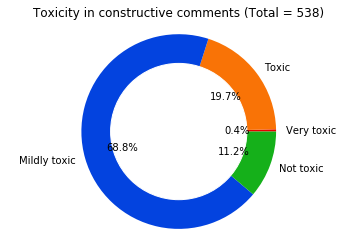

In [15]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[constructive_very_toxic, constructive_toxic, constructive_mildly_toxic, constructive_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
create_plot(size,labels,colors, 'Toxicity in constructive comments (Total = '  + str(total) + ')')

# Plot toxicity distribution for non-constructive comments

In [16]:
# Plot toxicity (with context) distribution for non constructive comments
nconstructive_very_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Non constructive very toxic: ', nconstructive_very_toxic)
nconstructive_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Non constructive toxic: ', nconstructive_toxic)
nconstructive_mildly_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Non constructive mildly toxic: ', nconstructive_mildly_toxic)
nconstructive_not_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Non constructive non toxic: ', nconstructive_not_toxic)

Non constructive very toxic:  8
Non constructive toxic:  69
Non constructive mildly toxic:  187
Non constructive non toxic:  41


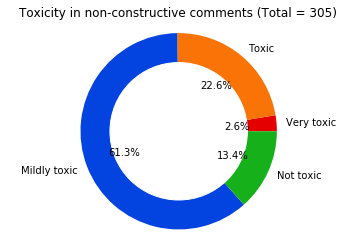

In [17]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[nconstructive_very_toxic, nconstructive_toxic, nconstructive_mildly_toxic, nconstructive_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
create_plot(size,labels,colors,'Toxicity in non-constructive comments (Total = '  + str(total) + ')')

# Plot toxicity distribution for ambiguous comments

In [18]:
# Plot toxicity (with context) distribution for ambiguous comments
ns_very_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Ambiguous very toxic: ', ns_very_toxic)
ns_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Ambiguous toxic: ', ns_toxic)
ns_mildly_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Ambiguous mildly toxic: ', ns_mildly_toxic)
ns_not_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Ambiguous non toxic: ', ns_not_toxic)

Ambiguous very toxic:  4
Ambiguous toxic:  45
Ambiguous mildly toxic:  98
Ambiguous non toxic:  11


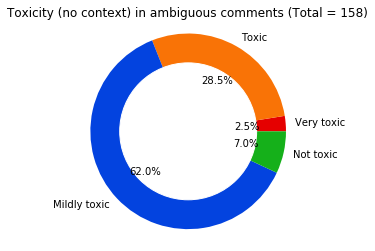

In [19]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[ns_very_toxic, ns_toxic, ns_mildly_toxic, ns_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
create_plot(size,labels,colors, 'Toxicity (no context) in ambiguous comments (Total = '  + str(total) + ')')

# Check how the annotators did on internal gold questions

In [ ]:
# Starting from batch three we have included internal gold questions for toxicity and constructiveness (20 each) with 
# internal_gold_constructiveness flag True 

In [16]:
internal_gold_con_df = df[df['constructive_gold'].notnull()]

In [17]:
internal_gold_con_df['constructive_binary'] = internal_gold_con_df['constructive'].apply(lambda x: 'yes' if x > 0.6 else 'no' )

In [25]:
# If this number is high (>5) we should be worried.  
internal_gold_con_df[internal_gold_con_df['constructive_binary'] != internal_gold_con_df['constructive_gold']].shape[0]

0

In [20]:
internal_gold_tox_df = df[df['crowd_toxicity_level_gold'].notnull()]

In [21]:
internal_gold_tox_df['crowd_toxicity_level_binary'] = internal_gold_tox_df['crowd_toxicity_level'].apply(lambda x: 'yes' if x > 1 else 'no')

/Users/vkolhatk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
internal_gold_tox_df['crowd_toxicity_level_gold_binary'] = internal_gold_tox_df['crowd_toxicity_level_gold'].apply(lambda x: 'no' if x == 1 else 'yes')

/Users/vkolhatk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
# Again we should be worried if this number is high (>5)
internal_gold_tox_df[internal_gold_tox_df['crowd_toxicity_level_gold_binary'] != internal_gold_tox_df['crowd_toxicity_level_binary']].shape[0]

0